# 1D/2D analysis

In [1]:
# import required modules
import pickle5
import pandas as pd
import numpy as np

In [2]:
DataPath = "../" # the folder containing the required files
OptFN = "{}options_full.ini".format(DataPath)

In [3]:
#### FUNCTIONS ####
# get run parameters from options file	
def get_Options(OptFN, OptionsDic, AllowedPars):
    try:
        optionsfile=open(OptFN, "r")
        for line in optionsfile :
            if line[:1] != "#" and len(line.strip("\n".strip(""))) > 1 :
                splitted_line = line.split(":")
                key=splitted_line[0].split(" ")[0]
                value=splitted_line[1].strip("\n").split(" ")[0]
                if key in AllowedPars :
                    OptionsDic[key] = value 
    except:
        print('Error reading %s file !' % (OptFN))

    return OptionsDic

#retrieve list of lists based on 2 separators
def double_split(Text, sep1, sep2):
    # further parse options
    WholeL = []
    MainL = Text.split(sep1)
    for text in MainL:
        WholeL.append(text.strip().split(sep2))

    return WholeL


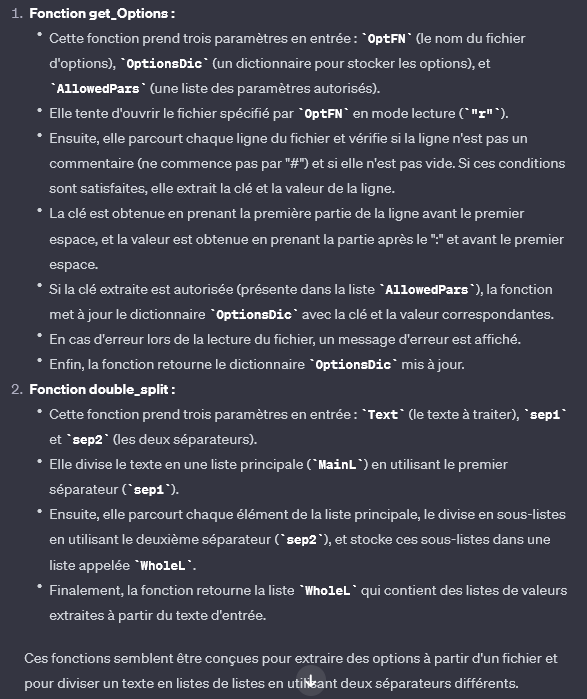

In [4]:
## load required data
# the options
OptionsDic = {}
AllowedPars = ["Partners"]
OptionsDic = get_Options(OptFN, OptionsDic, AllowedPars)
ComplexesL = double_split(OptionsDic["Partners"], ";", "~")[0]
# the AAvarsDic
AAvarsDic = {} 
with open(r"{}SR_AAvars_{}_vs_{}.pkl".format(DataPath,ComplexesL[0], ComplexesL[1]), "rb") as input_file:
    AAvarsDic = pickle5.load(input_file)

#print(AAvarsDic['W33R:N92D']['IndBCData'])
print(len(AAvarsDic['WT:WT']['IndBCData']))

## Drop irrelevant information
for key in AAvarsDic.keys():
    del AAvarsDic[key]['IndBCData']
    
print("{} single mutant combinations found in SR_AAvars dictionary for complex partners {} (A) and {} (B) !".format(len(AAvarsDic.keys()), ComplexesL[0], ComplexesL[1]))

2324
12275 single mutant combinations found in SR_AAvars dictionary for complex partners VN1551_VHH2 (A) and VN1554_TNFa-2 (B) !


In [5]:
print(OptionsDic)
print(ComplexesL)
print(len(AAvarsDic))
print(AAvarsDic.keys)
print(AAvarsDic['W33R:N92D'])

{'Partners': 'VN1551_VHH2~VN1554_TNFa-2'}
['VN1551_VHH2', 'VN1554_TNFa-2']
12275
<built-in method keys of dict object at 0x00000215044B3BD8>
{'Stats': [0.46197339413227434, 0.08766450538555383, 15]}


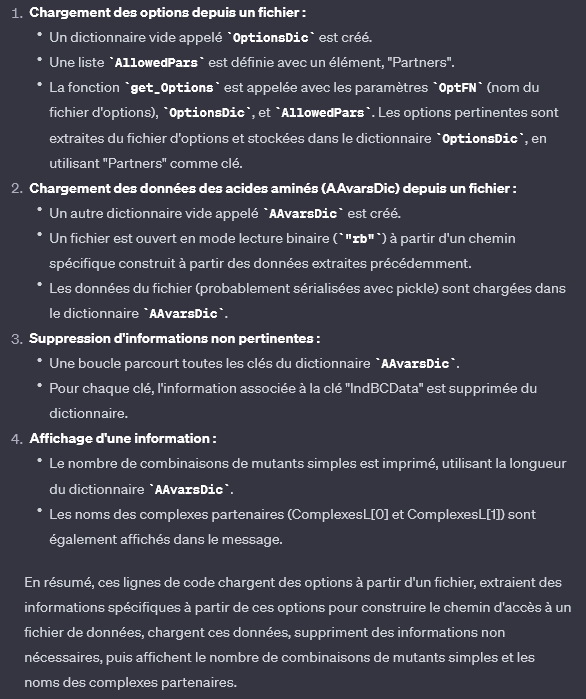

In [6]:
dMutL = list(AAvarsDic.keys()) # list of 2D variant combination
# remove double mutants supported by less than Min_dBCs and SD more than NormEnrichFactor
Min_dBCs = 2
MaxSD_NormEnrichFactor = 0.8
for key in dMutL:
    if ( AAvarsDic[key]['Stats'][2] >= Min_dBCs ) and ( AAvarsDic[key]['Stats'][1] <= (AAvarsDic[key]['Stats'][0] * MaxSD_NormEnrichFactor )):
        AAvarsDic[key] = AAvarsDic[key]['Stats'] # Normalized enrichment, SD and diffent BCs supporting the combination of variants
    else:
        del AAvarsDic[key]


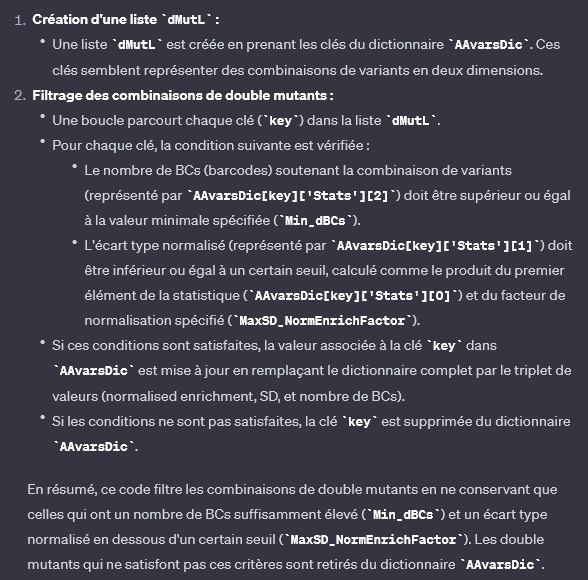

In [7]:
# print some information to see if everything is fine
i = 1
for key in AAvarsDic.keys():
    if i <= 3:
        print("{}:{}".format(key, AAvarsDic[key]))
        i += 1

Y35S:WT:[0.6152434272213412, 0.1331494972321767, 281]
N54*:T79L:[0.09503606336654166, 0.017812761411372724, 4]
WT:S81F:[0.1911003324349234, 0.08473332277764442, 123]


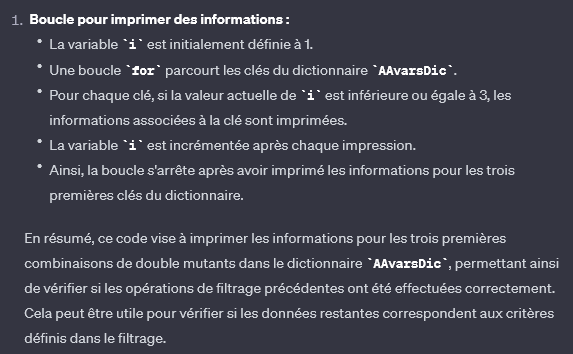

In [8]:
# evaluate number of mutants / partner and the maximum number of theoretical combinations
pA_Vars = set()
pB_Vars = set()
for key in AAvarsDic.keys():
    key_split = key.split(":")
    pA_Vars.add(key_split[0])
    pB_Vars.add(key_split[1])

pA_VarsL = list(pA_Vars)
pA_PosL = [int(var[1:-1]) if var != "WT" else 0 for var in pA_VarsL] # list num residu
pB_VarsL = list(pB_Vars)
pB_PosL = [int(var[1:-1]) if var != "WT" else 0 for var in pB_VarsL]

Tcomb = len(pA_VarsL) * len(pB_VarsL) 
print("Total number of mutation in partner A: {}\nTotal number of mutation in partner B: {}\nMaximum theoretical number of 2D mutants: {}".format(len(pA_VarsL),len(pB_VarsL), Tcomb))

Total number of mutation in partner A: 129
Total number of mutation in partner B: 107
Maximum theoretical number of 2D mutants: 13803


In [9]:
for i in range(3):
    print(pA_VarsL[i])

N74L
W33G
N74R


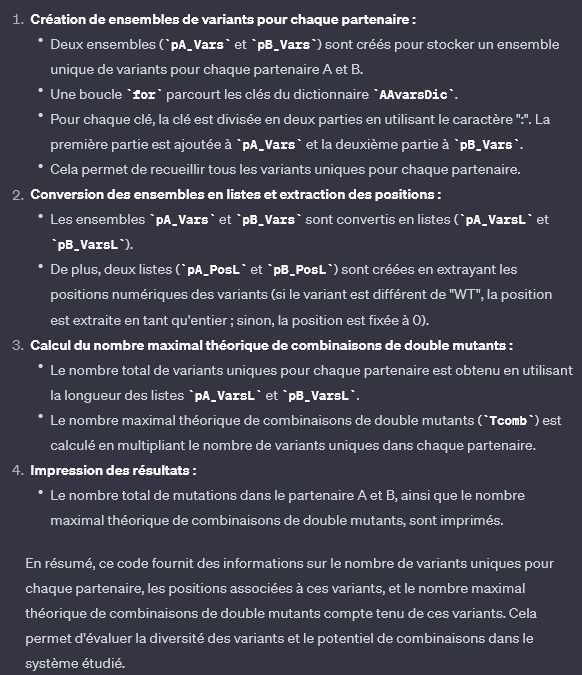

In [10]:
# take position of an mutation
def takePos(muta):
    if muta != "WT":
        pos = int(muta[1:-1])
    else:
        pos = 0
    return pos

pA_Vars = set()
pB_Vars = set()
for key in AAvarsDic.keys():
    key_split = key.split(":")
    pA_Vars.add(key_split[0])
    pB_Vars.add(key_split[1])

pA_VarsL = PB_VarsL = []

pA_VarsL = list(pA_Vars)
pA_VarsL.sort(key=takePos)

pB_VarsL = list(pB_Vars)
pB_VarsL.sort(key=takePos)

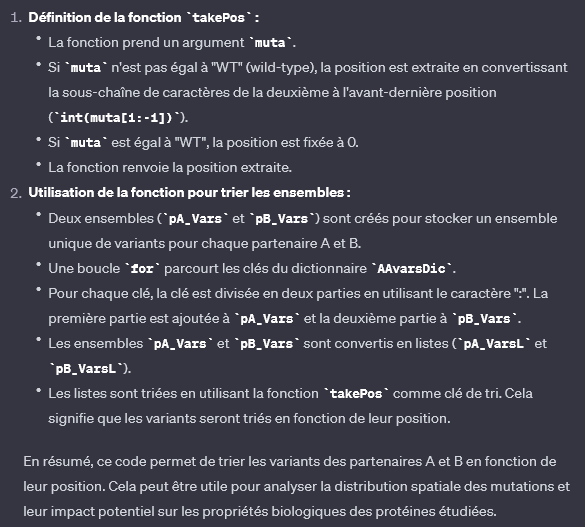

In [11]:
# construct the pandas dataframe scaffold
AAvarsDF = pd.DataFrame(index=pA_VarsL, columns=pB_VarsL)
AAvarsSdDF = pd.DataFrame(index=pA_VarsL, columns=pB_VarsL)
AAvarsNdBCsDF = pd.DataFrame(index=pA_VarsL, columns=pB_VarsL)

In [12]:
AAvarsSdDF.head(5)

,WT,R32N,R32K,R32D,R32F,L75F,L75M,L75E,L75I,L75W,...,E146D,S147L,S147G,S147N,S147D,S147M,S147K,S147E,S147T,S147F
WT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S30E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S30G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S30F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S30D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


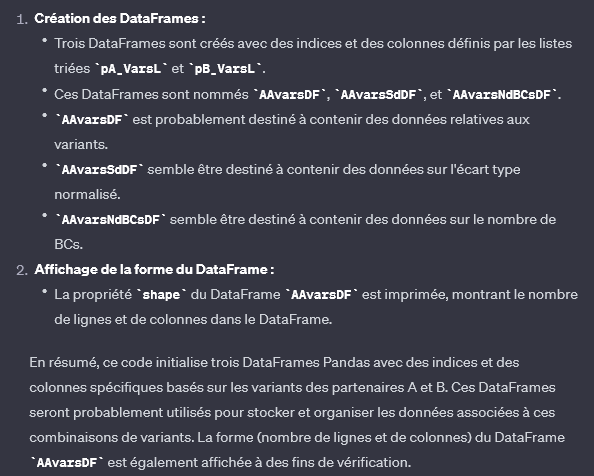

In [13]:
# fill pandas dataframes (DF) with values
#enrichment DF

for key in AAvarsDic.keys():
    key_split = key.split(":")
    AAvarsDF.loc[key_split[0]][key_split[1]] = AAvarsDic[key][0]
#Standard deviation DF
for key in AAvarsDic.keys():
    key_split = key.split(":")
    AAvarsSdDF.loc[key_split[0]][key_split[1]] = AAvarsDic[key][1]
#Number of barcodes DF
for key in AAvarsDic.keys():
    key_split = key.split(":")
    AAvarsNdBCsDF.loc[key_split[0]][key_split[1]] = AAvarsDic[key][2]

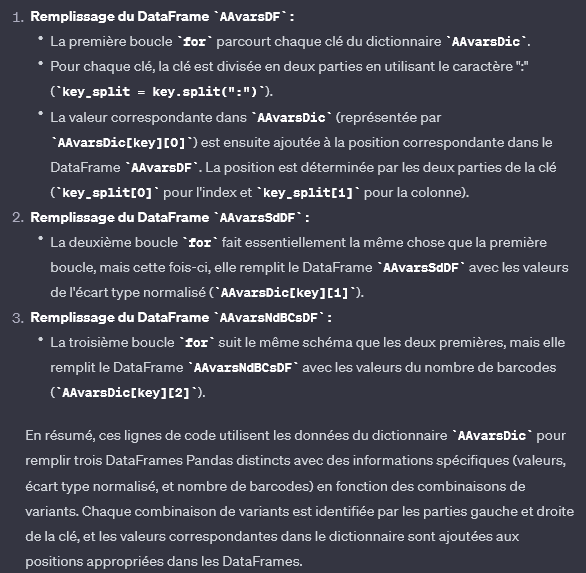

In [14]:
AAvarsSdDF

,WT,R32N,R32K,R32D,R32F,L75F,L75M,L75E,L75I,L75W,...,E146D,S147L,S147G,S147N,S147D,S147M,S147K,S147E,S147T,S147F
WT,0.304905,0.394201,0.150643,0.491544,0.167946,0.230431,0.293296,0.104377,0.336566,0.173282,...,0.295283,0.30751,0.365447,0.197664,0.199995,0.161727,0.213562,0.482725,0.237236,0.200558
S30E,0.302589,NaN,0.189207,NaN,0.161208,0.07363,0.616135,0.093009,0.960532,0.239112,...,0.081654,0.476942,0.068238,0.23375,0.716252,0.052678,0.313981,0.29743,0.31968,0.110123
S30G,0.251795,1.295866,0.300392,0.271427,0.037803,0.005777,0.356805,0.244642,0.536812,0.205326,...,0.209517,0.248615,0.279716,0.185743,0.077992,0.00784,0.347615,0.732814,0.05057,0.045033
S30F,0.271004,NaN,NaN,0.200551,0.070458,NaN,0.095752,0.082566,NaN,NaN,...,NaN,0.07822,0.220005,0.23721,NaN,0.479902,0.096093,0.341052,0.111052,0.067596
S30D,0.161273,0.272747,NaN,NaN,0.081482,0.473074,0.195155,NaN,NaN,NaN,...,0.364313,0.002427,0.260377,NaN,NaN,NaN,0.213748,1.368234,NaN,0.16894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F103M,0.147892,NaN,NaN,NaN,0.031914,NaN,0.169304,NaN,NaN,NaN,...,NaN,0.30231,0.250293,NaN,NaN,NaN,0.120264,NaN,NaN,0.113303
F103N,0.203971,NaN,0.001946,NaN,0.117422,0.445356,0.344109,0.178825,1.303961,NaN,...,0.24205,0.218712,0.043387,0.311314,1.031404,0.093891,0.022039,0.191284,0.248205,0.050835
F103S,0.139703,NaN,NaN,NaN,0.055108,NaN,0.210432,NaN,NaN,NaN,...,NaN,0.11877,0.320168,NaN,NaN,NaN,0.330516,NaN,NaN,0.057647
F103I,0.218551,NaN,NaN,NaN,0.054354,NaN,NaN,0.327757,NaN,NaN,...,NaN,0.391198,0.200551,NaN,NaN,NaN,0.510936,NaN,NaN,0.186571


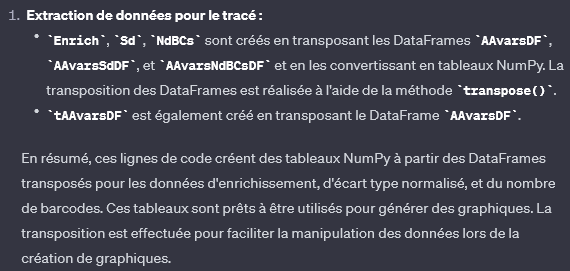

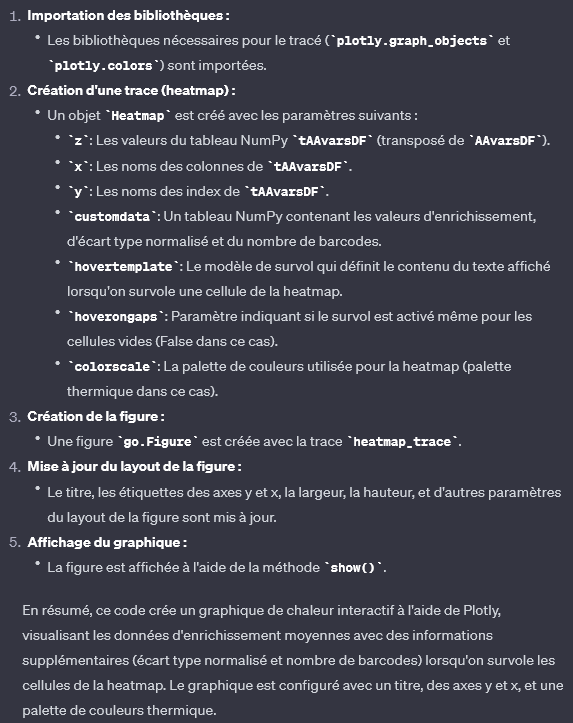

In [15]:
import plotly.graph_objects as go
import plotly.colors as go_colours

def plotHeatmap(resA="", resB=""):
    global AAvarsDF
    global AAvarsSdDF
    global AAvarsNdBCsDF
    DF      = AAvarsDF
    SdDF    = AAvarsSdDF
    NdBCsDF = AAvarsNdBCsDF
    
    if resA != "":
        resRowRemove = []
        for res in pA_VarsL:
            if res[:3] != resA and res != "WT":
                resRowRemove.append(res)

        DF      = DF.drop(resRowRemove, axis=0)
        SdDF    = SdDF.drop(resRowRemove, axis=0)
        NdBCsDF = NdBCsDF.drop(resRowRemove, axis=0)

        resColRemove = []
        for res in pB_VarsL:
            if res[:3] != resB and res != "WT":
                resColRemove.append(res)

        DF      = DF.drop(resColRemove, axis=1)
        SdDF    = SdDF.drop(resColRemove, axis=1)
        NdBCsDF = NdBCsDF.drop(resColRemove, axis=1)
        
    # prepare useful data for plotting
    Enrich    = DF.transpose().to_numpy()
    Sd        = SdDF.transpose().to_numpy()
    NdBCs     = NdBCsDF.transpose().to_numpy()
    tAAvarsDF = DF.transpose()
    
    heatmap_trace = go.Heatmap(
                    z = tAAvarsDF,
                    x = tAAvarsDF.columns,
                    y = tAAvarsDF.index,
                    customdata = np.stack((Enrich, Sd, NdBCs), axis=-1),
                    hovertemplate=('<b>{} '.format(ComplexesL[0]) + '(%{x})' + '<BR>{} '.format(ComplexesL[1]) + 
                                   '(%{y})</b><BR><BR>Enrichment: %{customdata[0]:,.2f}' + '<BR>sd: %{customdata[1]:,.3f}' + '<BR>Nbr_dBCs: %{customdata[2]}' +
                                   '<extra></extra>'),
                    hoverongaps = False, 
                    colorscale=[[0.0, "white"],
                        [0.0222222222222222, '#3b19ff'],
                        [0.0444444444444444, '#3b19ff'],
                        [0.0888888888888888, '#6fa8dc'],
                        [0.1333333333333333, '#93c47d'],
                        [0.2000000000000000, '#ffe599'],
                        [0.2777777777777777, '#f1c232'],
                        [0.3333333333333333, '#e69138'],
                        [0.4666666666666666, '#d63636'],        
                        [0.8888888888888888, '#69031a'], 
                        [1, '#69031a']]
                     )

    fig = go.Figure(heatmap_trace)
    fig['layout'].update(title='Normalized Enrichment Avarage', 
                         yaxis={"title": ComplexesL[1]},
                         xaxis={"title": ComplexesL[0]}, 
                         width=1200,
                         height=800,
                         autosize=False,

                        )
    fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
    fig['layout']['yaxis']['autorange'] = "reversed"
    fig.update_xaxes(side="top")
    fig.show()

In [23]:
plotHeatmap()
plotHeatmap("W33", "N92")


In [17]:
# print mutant related general information
print(AAvarsDic["W33R:N92D"])

[0.46197339413227434, 0.08766450538555383, 15]


In [18]:
# prepare to print mutant barcode specific information 
WholeAAvarsDic = {}
with open(r"{}SR_AAvars_{}_vs_{}.pkl".format(DataPath,ComplexesL[0], ComplexesL[1]), "rb") as input_file:
    WholeAAvarsDic = pickle5.load(input_file)

In [19]:
# print mutant combination related barcodes and their normalized enrichment
print(WholeAAvarsDic["W33R:N92D"])

{'IndBCData': [['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:ACTCGTCACGCCTTGTTACGCATTGTATCGCATC', 0.5784182906434453], ['TTTTGTTCTGATTCGTATTGTTTTGATTTGTTTC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.7645880125030093], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.7100670937204137], ['TTTTGTTCTGATTCGTATTGTTTTGATTTGTTTC:ACTCGTCACGCCTTGTTACGCATTGTATCGCATC', 0.4225549209195375], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:TCTCGTTTCGTTACGTTTTGCCTTGCATTGTTTT', 0.5266140129349028], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:TTTTGTTTTGTTTCGTTTTGTTTTGCATTGTTTT', 0.3237802891691749], ['TTTTGTTCTGATTCGTATTGTTTTGATTTGTTTC:TACCGAAACGTTTCGCCACGCCCTGTACCGTCAC', 0.39780677026282196], ['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.5535744815103125], ['TTTTGTTTTGTTATGTTTTGTTTTGCTTTGTTTT:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.6071272597659878], ['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:TCTCGTTTCGTTACGTTTTGCCTTGCATTGTTTT', 0.44867990383088935], ['TTTTGCCATGATACGAATCGTAATGTCCTGT

In [20]:
print(WholeAAvarsDic["W33R:WT"])

{'IndBCData': [['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:ACTTGTTACGTTCTGTTCTGTACTGTCTTGTTTT', 0.09727397188731608], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:TCTTGCTACGCTACGATTTGTTTTGATACGCCTT', 0.12019848218037753], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:CCTTGTTTTGTAACGCTTTGATTCGTTTCGCTTT', 0.13529549255454], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:CCCCGAATTGTCCCGCAATGCCCCGTCCCGCCAT', 0.14181074680665412], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:CCACGTCCCGACACGAAATGACATGTCCTGTCTC', 0.12213827724964595], ['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:CACTGAACCGTCCTGCAATGTCATGTCCCGAACC', 0.13363619247945352], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:ACCTGTTTCGCTCCGTTTCGTTTTGTTTTGTTTT', 0.09725829452448148], ['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:CCCCGAATTGTCCCGCAATGCCCCGTCCCGCCAT', 0.0982238938920548], ['TAACGCCCTGTCCCGACCCGTACCGTCCCGCACC:CCACGACCCGACCCGCCACGACCCGTTCCGACCC', 0.22059449503257306], ['TTTTGCCATGATACGAATCGTAATGTCCTGTAAT:ACTTGTTACGTTCTGTTCTGTACTGTCTTGTTTT', 0.13056095571919887], ['TTTTGTTCTGATTCGTATTGTTTTGAT

In [21]:
print(WholeAAvarsDic["WT:N92D"])

{'IndBCData': [['AAACGAACCGCCACGCACCGTAACGACACGAAAC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.9827175723018017], ['AACCGTACCGAACCGTAATGAAATGCACCGCAAC:TTTTGTTTTGTTTCGTTTTGTTTTGCATTGTTTT', 0.798097691330472], ['CCACGACCCGCCCCGACACGACATGCCACGCCAC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 1.0932319390185699], ['AAACGCCACGAAACGAACTGTTACGATACGAAAT:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.9725102312798523], ['TTATGCACTGTTTTGAATTGTTATGACCTGTTTT:ACTCGTCACGCCTTGTTACGCATTGTATCGCATC', 1.0922286090594886], ['TCTTGCATCGCAACGAACCGACATGCACCGTCAT:ACTCGTCACGCCTTGTTACGCATTGTATCGCATC', 1.0436032934640478], ['AACCGTACCGAACCGTAATGAAATGCACCGCAAC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.9237036371542515], ['ACACGCACTGACACGAACCGATACGTTACGAAAC:CCCCGACCCGAATCGCCACGCCCCGATCCGCCAC', 0.9349729237735265], ['ACATGTAATGCAATGAAACGACACGCAACGCAAC:ACTCGTCACGCCTTGTTACGCATTGTATCGCATC', 0.9878028873403828], ['TTTTGATTTGTTTTGTTTTGTCTTGTTTTGTTTT:TTTTGTTTTGTTTCGTTTTGTTTTGCATTGTTTT', 0.7707576467659368], ['TTTTGCCTCGACCCGTTCTGATTCGATTCGATCC

# Transposition en bokeh d'après le Notebook de Raph

In [22]:
import bokeh as bk
import pandas_bokeh as pd_bk
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
pd_bk.output_notebook()

# Utiliser pandas-bokeh pour activer l'intégration de Bokeh avec Pandas
pd_bk.output_notebook()

# Créer un mappage de couleurs linéaire pour la heatmap
mapper = linear_cmap(field_name='value', palette='Viridis256', low=min(tAAvarsDF.min()), high=max(tAAvarsDF.max()))

# Créer la heatmap avec Pandas-Bokeh
heatmap_plot = tAAvarsDF.plot_bokeh(
    kind='heatmap',
    colormap='Viridis256',
    colorbar=False,
    title='Normalized Enrichment Avarage',
    xlabel=ComplexesL[0],
    ylabel=ComplexesL[1],
    colormap_cmap='Viridis256',
    clim=(min(tAAvarsDF.min()), max(tAAvarsDF.max())),
    hovertool_string='Enrichment: @value{,.2f}',
    width=1200,
    height=800,
)

# Ajouter une barre de couleur à la heatmap
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0, 0))
heatmap_plot.add_layout(color_bar, 'right')

# Afficher le graphique
pandas_bokeh.show(heatmap_plot)


Loading BokehJS ...

Loading BokehJS ...

NameError: name 'tAAvarsDF' is not defined

## Celui de Raph

In [ ]:
"""
Data plotting bis (taking into account the number of barcodes supporting the observation)
"""

data_tot=dict(
    xax = mut_xaxis_partner2,
    yax = mut_yaxis_partner1,
    colors = color,
    enrich = enrich_mutation_array.flatten(),
    alphas = alpha,
    mut2vsWT_xax = mu1vsWT_yaxis_partner1, 
    mut1vsWT_yax = mut2vsWT_xaxis_partner2,
    nbc_size = nbc_mutation_array.flatten()/10.,
)

    #aa_mut_xax = aa_mut_xaxis_partner2,
    #aa_mut_yax = aa_mut_yaxis_partner1,
p = bk.plotting.figure(title="Effects of double mutations according to the enrichment factors", 
                       x_axis_location="above", tools="hover, save, box_zoom, pan, reset",
                       x_range=["WT"]+l_mutation_vector_2, y_range=list(reversed(["WT"]+l_mutation_vector_1)),
                       tooltips = [
                           ('Mut partner 1', '@yax'), 
                           ('Mut partner 2', '@xax'), 
                           ('Enrichments', '@enrich'), 
                           ('Mut in Partner1 vs WT', '@mut1vsWT_yax'),
                           ('Mut in Partner2 vs WT', '@mut2vsWT_xax'), 
                           
                       ]
                      )
p.width = 900
p.height = 900
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

"""
To modulate the size of the boxes wth respect to the number of barcodes : 
--> switch the comments between the two following lines
"""

p.rect('xax', 'yax', 'nbc_size', 'nbc_size', source=data_tot, color='colors', line_color=None, alpha='alphas', 
       hover_line_color='black', hover_color='colors')
#p.rect('xax', 'yax', 0.9, 0.9, source=data_tot, color='colors', line_color=None, alpha='alphas', 
#       hover_line_color='black', hover_color='colors')

bk.plotting.show(p)